In [ ]:
!pip install ipython-autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=ee870e0f0e7d42ff1f946edf668065c3ac256588ce287d62bde9e7b4ff700f56
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [ ]:
%load_ext autotime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping, ModelCheckpoint
import pickle

from tensorflow import keras
from sklearn import svm, metrics

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(tf.__version__)

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
2.3.0
time: 6.88 ms


In [ ]:
# !cat /proc/cpuinfo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
time: 21.1 s


In [ ]:
#provide your url
DATA_PATH= 'drive/My Drive/PATH/'

time: 1.01 ms


In [ ]:
x = pickle.load(open(DATA_PATH+'X.pickle','rb'))
y = pickle.load(open(DATA_PATH+'y.pickle','rb'))

time: 5.08 s


In [ ]:
print("Length of x: ", len(x))
print("Length of y: ", len(y))

Length of x:  20000
Length of y:  20000
time: 1.25 ms


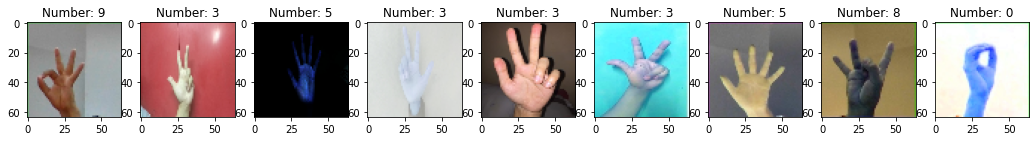

time: 1.39 s


In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x[0:9], y[0:9])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image)
 plt.title('Number: %i' % label, fontsize = 12)

In [ ]:
IMG_SIZE = 64

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

y = np.array(y)

time: 90.8 ms


In [ ]:
x=x/255.0

time: 644 ms


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2, stratify=y)

time: 602 ms


In [ ]:
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)

xtrain shape:  (16000, 64, 64, 3)
xtest shape:  (4000, 64, 64, 3)
time: 949 µs


In [ ]:
zero=[]
for index, (image, label) in enumerate(zip(xtest, ytest)):
  if label ==0:
    zero.append(image)
len(zero)

400

time: 8.42 ms


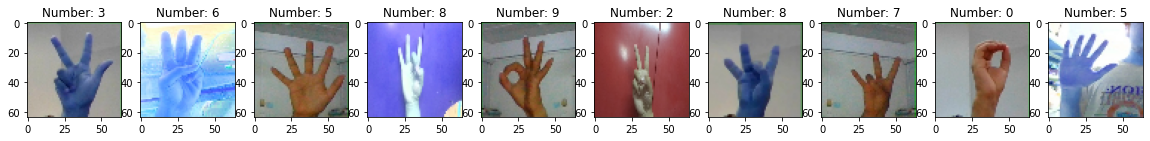

time: 1.06 s


In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(xtrain[900:910], ytrain[900:910])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image)
 plt.title('Number: %i' % label, fontsize = 12)

In [ ]:
xtrain.shape

(16000, 64, 64, 3)

time: 2.41 ms


In [ ]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(kernel='linear', verbose=True)
#fit to the trainin data
classifier.fit(np.reshape(xtrain, (xtrain.shape[0], -1)), ytrain)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

time: 1h 28min 41s


In [ ]:
# now to Now predict the value of the digit on the test data
# xtest=np.reshape(xtest, (xtest.shape[0], -1))
y_pred = classifier.predict(np.reshape(xtest, (xtest.shape[0], -1)))

time: 14min 15s


In [ ]:
from sklearn.metrics import accuracy_score
# calculate accuracy
accuracy = accuracy_score(ytest, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.7025
time: 2.96 ms


In [ ]:
print("Classification report for classifier %s:\n%s\n"%(classifier, metrics.classification_report(ytest, y_pred)))


Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True):
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       400
           1       0.63      0.72      0.67       400
           2       0.69      0.69      0.69       400
           3       0.71      0.71      0.71       400
           4       0.68      0.68      0.68       400
           5       0.72      0.68      0.70       400
           6       0.77      0.74      0.76       400
           7       0.71      0.66      0.68       400
           8       0.74      0.67      0.70       400
           9       0.75      0.73      0.74       400

    accuracy                           0.70      4000
   macro avg       0.71      0.70      0.70      4000
weight

In [ ]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(ytest, y_pred))

Confusion matrix:
[[295  21  13  10   8  13  10  13   4  15]
 [ 17 298  24  10   5  13   8   7  10  12]
 [ 19  20 244  28  10  14  10  18  17   6]
 [ 19  16  17 260  12  14   7   2   8  20]
 [ 12  20  17  14 295  15  13  16  12  12]
 [ 23  20  10  20  24 259   7   6   9  12]
 [ 22  11  12  10  16  10 312  11  10   5]
 [ 23  24  12  13  29  18  19 255  13   9]
 [ 18  13   8  17  22  10   9  10 266   9]
 [ 19  23   6  10  11  14   6  10  16 286]]
time: 16.5 ms


In [ ]:
#Getting the misclassified images’ index
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
correctClass =[]
for label, predict in zip(ytest, y_pred):
  if label != predict:
    misclassifiedIndexes.append(index)
  else:
    correctClass.append(index)

  index +=1
print('Total number of misclassified class: ', len(misclassifiedIndexes))
print('Total number of correctly classified class: ', len(correctClass))
print('Total number testing data: ', len(misclassifiedIndexes)+len(correctClass))

Total number of misclassified class:  1230
Total number of correctly classified class:  2770
Total number testing data:  4000
time: 8.28 ms


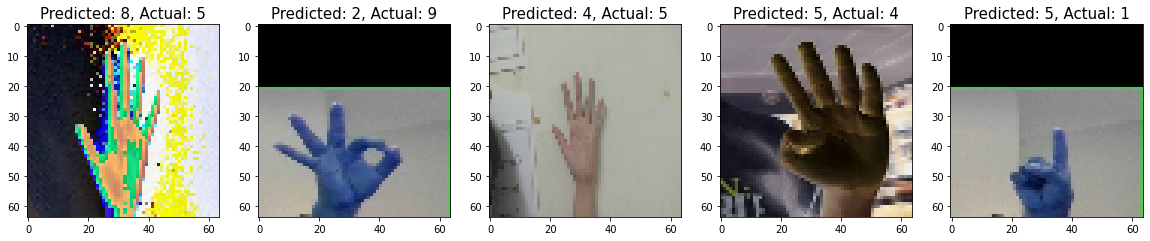

time: 938 ms


In [ ]:
#Showing the misclassified images and image labels using matplotlib
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
#  plt.imshow(np.reshape(xtest[badIndex]))
 plt.imshow(xtest[badIndex])
 plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], ytest[badIndex]), fontsize = 15)

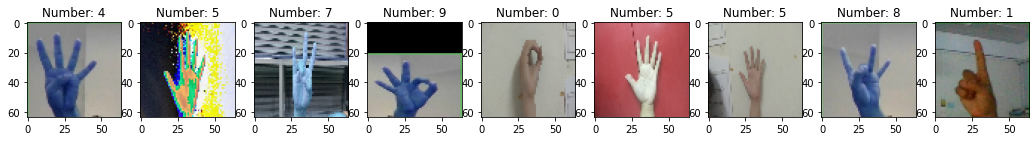

time: 1.5 s


In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(xtest[:9], ytest[:9])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image)
 plt.title('Number: %i' % label, fontsize = 12)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

time: 41.9 ms


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)

[[295  21  13  10   8  13  10  13   4  15]
 [ 17 298  24  10   5  13   8   7  10  12]
 [ 19  20 244  28  10  14  10  18  17   6]
 [ 19  16  17 260  12  14   7   2   8  20]
 [ 12  20  17  14 295  15  13  16  12  12]
 [ 23  20  10  20  24 259   7   6   9  12]
 [ 22  11  12  10  16  10 312  11  10   5]
 [ 23  24  12  13  29  18  19 255  13   9]
 [ 18  13   8  17  22  10   9  10 266   9]
 [ 19  23   6  10  11  14   6  10  16 286]]
time: 12.3 ms


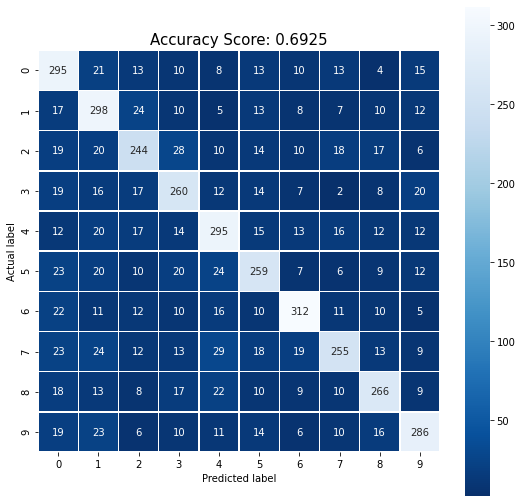

time: 841 ms


In [ ]:
plt.figure(figsize=(9,9))
# sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
sns.heatmap(cm, annot=True, fmt="1", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);